In [1]:
import sys
sys.path.append('..')
from security_game.green_security_game import GreenSecurityGame

In [2]:
import pandas as pd
# Data collected from publio domain study: Elephant Research - Kalamaloue National Park (Cameroon)
df = pd.read_csv("lobeke.csv")
df.dropna(inplace=True)
df

,animal_id,lat,long,timestamp
0,14118,2.476,15.769,2002-03-30 00:00:00.000
1,14118,2.502,15.740,2002-03-31 00:00:00.000
2,14118,2.506,15.744,2002-03-31 00:00:00.000
3,14118,2.507,15.747,2002-03-31 00:00:00.000
4,14118,2.479,15.771,2002-04-01 00:00:00.000
...,...,...,...,...
3178,46179,2.288,16.008,2004-08-11 01:37:19.000
3179,46179,2.286,16.007,2004-08-11 04:01:10.000
3180,46179,2.274,16.039,2004-08-11 06:55:32.000
3181,46179,2.297,16.012,2004-08-12 01:27:37.000


In [3]:
# Lobeke National Park Bounding Box
lat_min, lon_min = 2.05522, 15.8790
lat_max, lon_max = 2.2837, 16.2038

coordinate_rectangle = [lat_min, lat_max, lon_min, lon_max]

In [4]:
gsg = GreenSecurityGame(df, coordinate_rectangle, "centroid", num_clusters=3, num_rows=5, num_columns=5)
gsg.generate(num_attackers=1, num_defenders=1, home_base=(3,3), num_timesteps=4)

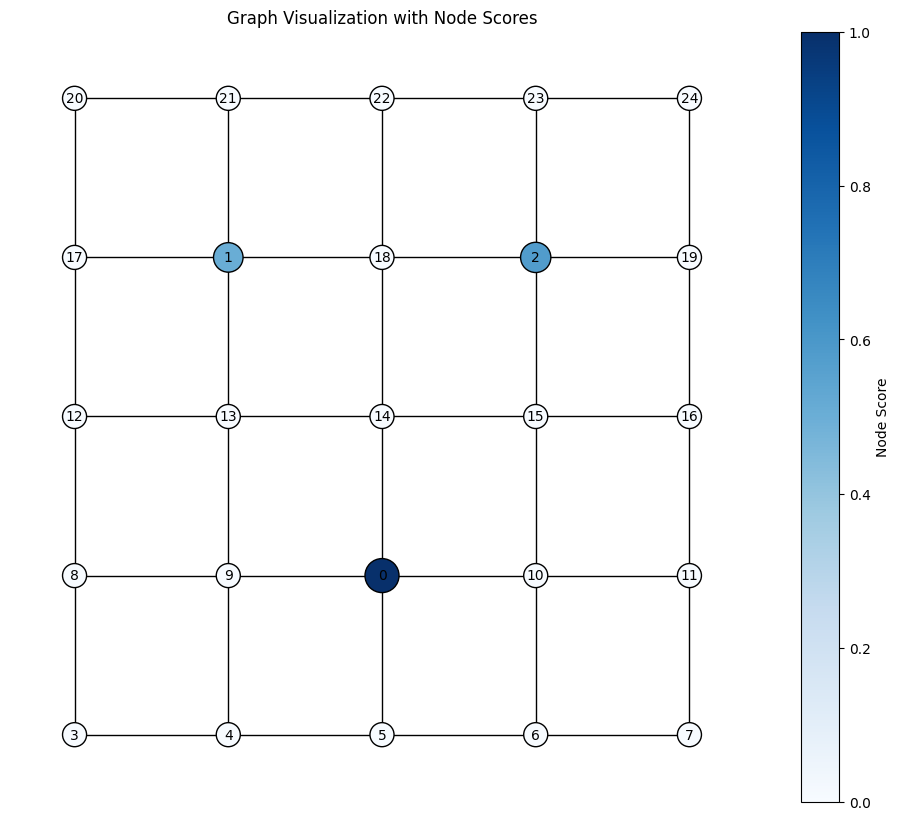

In [5]:
gsg.draw_graph()

In [6]:
gsg.utility_matrix

array([[-1.        , -0.50656168, -0.58136483,  0.        ],
       [-1.        , -0.50656168, -0.58136483,  0.        ],
       [-1.        , -0.50656168, -0.58136483,  0.        ],
       [-1.        , -0.50656168, -0.58136483,  0.        ],
       [-1.        , -0.50656168, -0.58136483,  0.        ],
       [-1.        , -0.50656168, -0.58136483,  0.        ],
       [-1.        , -0.50656168, -0.58136483,  0.        ],
       [-1.        , -0.50656168, -0.58136483,  0.        ],
       [-1.        , -0.50656168, -0.58136483,  0.        ],
       [-1.        , -0.50656168, -0.58136483,  0.        ],
       [ 0.        , -0.50656168, -0.58136483,  0.        ],
       [-1.        , -0.50656168, -0.58136483,  0.        ],
       [-1.        , -0.50656168, -0.58136483,  0.        ]])

In [7]:
import gurobipy as gp
from gurobipy import GRB
import numpy as np

def nash(
    utility_matrix
    ):

    num_rows = len(utility_matrix)
    num_cols = len(utility_matrix[0])

    # Create model
    m = gp.Model("NashLP_ColPlayer")
    m.Params.outputFlag = 0
    # Create variables
    y = [m.addVar(lb=0.0, name=f"y{j}") for j in range(num_cols)]
    z = m.addVar(lb=-float("inf"), name="z")
    m.setObjective(z, GRB.MINIMIZE) 
    # Add constraints 
    for i in range(num_rows):
        m.addConstr(z >= sum(utility_matrix[i][j] * y[j] for j in range(num_cols)), f"c_row_{i}")
    m.addConstr(sum(y) == 1, "sum_y")

    m.optimize()

    return (np.array([v.X for v in y]), m.ObjVal)

In [8]:
nash(gsg.utility_matrix)

Restricted license - for non-production use only - expires 2026-11-23


(array([0., 0., 1., 0.]), -0.5813648293963255)

In [9]:
gsg.attacker_strategies

array([[[0],
        [0],
        [0],
        [0]],

       [[1],
        [1],
        [1],
        [1]],

       [[2],
        [2],
        [2],
        [2]],

       [[None],
        [None],
        [None],
        [None]]], dtype=object)